### Imports necesarios y carga de datos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

# APARTADO B

In [3]:
b_cancer = datasets.load_breast_cancer()

In [4]:
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
b_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Correct classification Logistic  0.5 % of the data:  0.8912280701754386
Correct classification SVM       0.5 % of the data:  0.8315789473684211
Correct classification Logistic  0.7 % of the data:  0.8888888888888888
Correct classification SVM       0.7 % of the data:  0.8011695906432749
Correct classification Logistic  0.8 % of the data:  0.9122807017543859
Correct classification SVM       0.8 % of the data:  0.8771929824561403


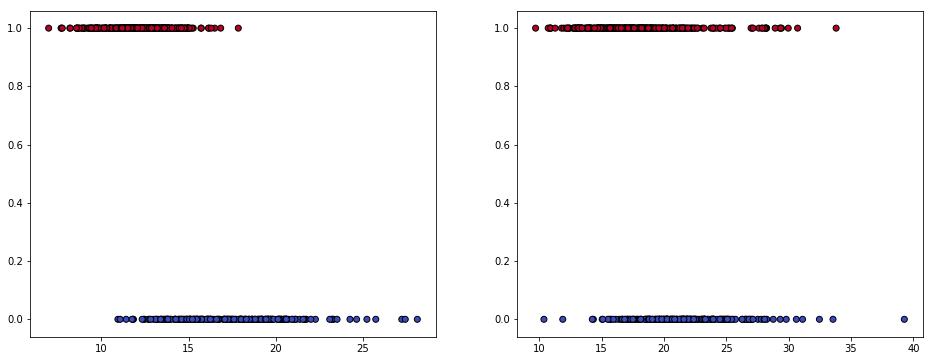

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

X = b_cancer.data[:, :2]
y = b_cancer.target

n_classes = 2

fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, solver='lbfgs')

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))


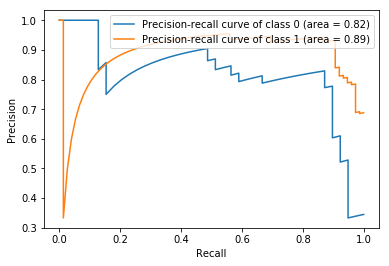

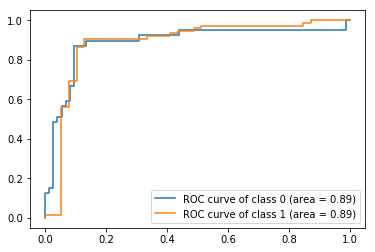

In [7]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    b_cancer = datasets.load_breast_cancer()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = b_cancer.data[:, :2]
    y = b_cancer.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('mean radius')
        ax.set_ylabel('mean texture')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


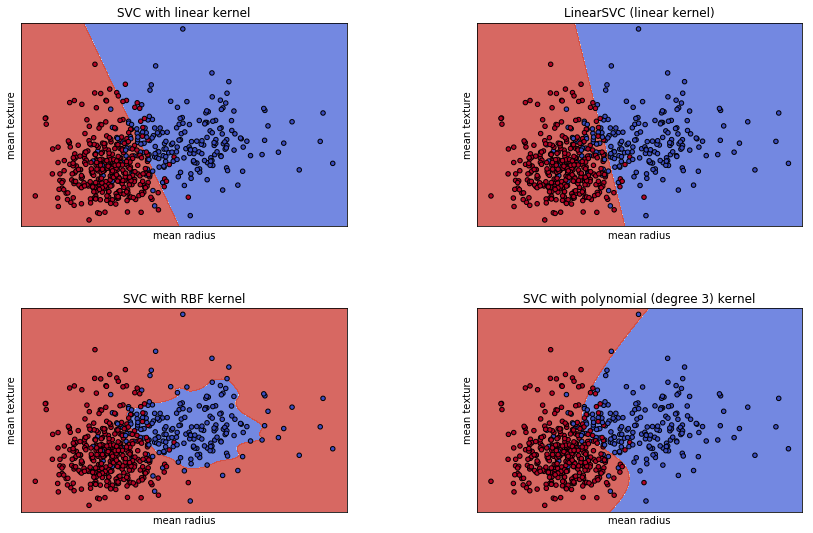

In [9]:
show_C_effect(C=0.1)

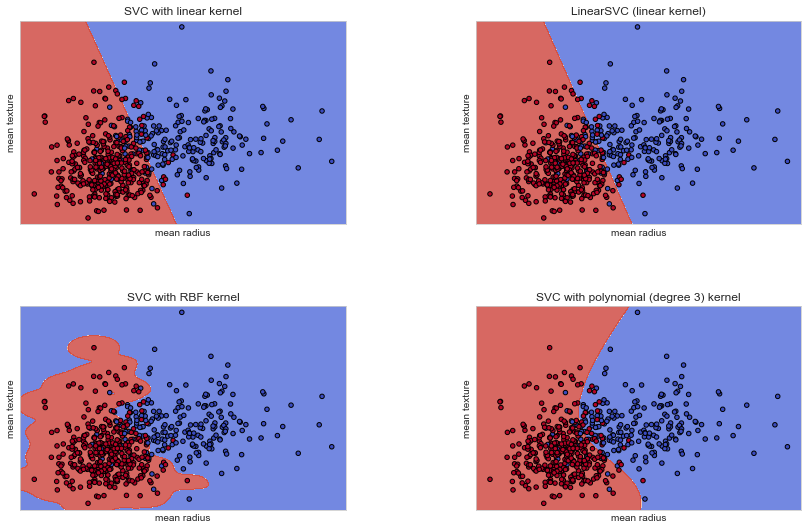

In [30]:
show_C_effect(C=0.9)

### Regresión Logística

In [11]:
y_test_pred = logireg.predict(x_v)
y_train_pred = logireg.predict(x_t)

lr_acc=accuracy_score(y_test_pred,y_v)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_t)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_v)*100))

print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_v))

Train Set Accuracy:89.45054945054946
Test Set Accuracy:91.22807017543859

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.92      0.95      0.93        73

   micro avg       0.91      0.91      0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



### SVC

In [12]:
y_test_pred2 = svc.predict(x_v)
y_train_pred2=svc.predict(x_t)

svc_acc=accuracy_score(y_test_pred2,y_v)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_t)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_v)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_v))

Train Set Accuracy:93.4065934065934
Test Set Accuracy:87.71929824561403

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        43
           1       0.88      0.93      0.90        71

   micro avg       0.88      0.88      0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114



### KNN

In [13]:
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_t,y_t)

y_test_pred3 = knn.predict(x_v)
y_train_pred3 = knn.predict(x_t)

knn_acc=accuracy_score(y_test_pred3,y_v)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_t)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_v)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_v))

Train Set Accuracy:89.23076923076924
Test Set Accuracy:93.85964912280701

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.99      0.93      0.95        80

   micro avg       0.94      0.94      0.94       114
   macro avg       0.92      0.95      0.93       114
weighted avg       0.94      0.94      0.94       114



### Comparacion entre modelos

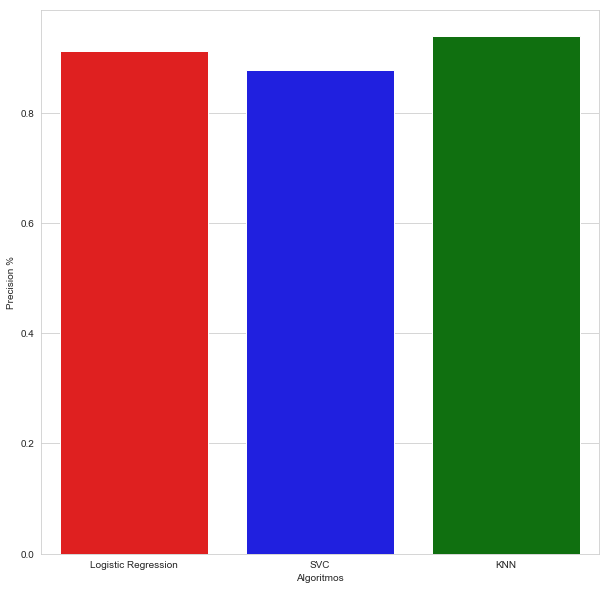

In [14]:
colors = ["red","blue","green"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.ylabel("Precision %")
plt.xlabel("Algoritmos")
sns.barplot(x=['Logistic Regression', 'SVC','KNN'],y=[lr_acc,svc_acc,knn_acc], palette=colors )
plt.show()

# APARTADO A

In [15]:
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('../Data/ApartadoA/weatherAUS.csv')

## EDA

In [16]:
dataset.shape

(145460, 23)

In [17]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
col_names = dataset.columns
print("Atributos de nuestro dataset:\n")
for atribut in col_names:
    print(atribut)

Atributos de nuestro dataset:

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RainTomorrow


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [20]:
dataset.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-09-11,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [21]:
dataset.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-09-11,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [22]:
dataset.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [23]:
print("Numero de valores nulos de la variable target:",dataset['RainTomorrow'].isnull().sum())
print("Numero de categorias de la variable target:",dataset['RainTomorrow'].nunique())
print("Que valores puede adoptar la variable target:",dataset['RainTomorrow'].unique())

Numero de valores nulos de la variable target: 3267
Numero de categorias de la variable target: 2
Que valores puede adoptar la variable target: ['No' 'Yes' nan]


In [24]:
dataset.dropna

<bound method DataFrame.dropna of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
5       2008-12-06   Albury     14.6     29.7       0.2          NaN   
6       2008-12-07   Albury     14.3     25.0       0.0          NaN   
7       2008-12-08   Albury      7.7     26.7       0.0          NaN   
8       2008-12-09   Albury      9.7     31.9       0.0          NaN   
9       2008-12-10   Albury     13.1     30.1       1.4          NaN   
10      2008-12-11   Albury     13.4     30.4       0.0          NaN   
11      2008-12-12   Albury     15.9     21.7       2.2          NaN   
12      2008-12-13   Albury   

In [25]:
dataset.shape

(145460, 23)

In [26]:
dataset['RainTomorrow'].value_counts()/len(dataset)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64